In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# OAI dataset
df = pd.read_csv("data/2.pre_preprocessed_OAI.csv")
df.shape

# GLAD dataset
dfg = pd.read_stata("data/2.Glad.dta")

In [3]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category
0,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,1
1,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,37.0,1,3
2,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,1,4
3,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,470.0,184.0,10,6
4304,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,477.0,135.0,10,5
4305,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,504.0,580.0,10,10
4306,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,516.0,268.0,10,8


In [4]:
dfg

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,PT12_39644,PT12_39672,PT12_39675,PT12_39676,Pt12_fes_i_score,PT12_39880,PT12_39881,stop_replyTime,stop_9561,stop_9563
0,2013-01-29 14:37:42,2013-01-14,11431,11431,3.0,5.0,70,1,71.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,2013-01-29 14:49:19,2013-01-15,11431,11431,3.0,5.0,66,2,69.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,2013-01-30 09:58:02,2013-12-06,11431,11431,3.0,5.0,44,2,102.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,2013-01-30 14:10:27,2013-01-30,11475,1100,2.0,2.0,49,1,110.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,2013-02-01 11:11:03,2013-02-01,11431,11431,3.0,5.0,67,2,82.0,169.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66210,2022-12-29 14:56:17,2022-12-29,15858,15858,3.0,3.0,72,2,64.0,157.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
66211,2022-12-29 15:28:10,2022-12-29,16527,16527,3.0,1.0,63,2,122.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
66212,2022-12-30 08:59:11,2022-12-30,18941,18941,3.0,4.0,64,2,79.0,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
66213,2022-12-30 09:32:55,2022-12-30,15858,15858,3.0,3.0,69,2,65.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


##### Preparing outcome variables in OAI

In [5]:
# Describe the outcome variables
def show_column_statistics(df, columns_need):
    for column in columns_need:
        if column in df.columns:
            print(f"Column: {column}")
            print(f"NaN values: {df[column].isna().sum()}")
            print(f"Min value: {df[column].min()}")
            print(f"Max value: {df[column].max()}")
            print("\n")
        else:
            print(f"Column: {column} is not in the DataFrame\n")

columns_need = ['V00PASE', 'V01PASE', 'V00KOOSQOL', 'V01KOOSQOL', 'V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV', 'V01P7LKRCV']
show_column_statistics(df, columns_need)


Column: V00PASE
NaN values: 0
Min value: 0.0
Max value: 531.0


Column: V01PASE
NaN values: 0
Min value: 0.0
Max value: 580.0


Column: V00KOOSQOL
NaN values: 1
Min value: 0.0
Max value: 100.0


Column: V01KOOSQOL
NaN values: 0
Min value: 0.0
Max value: 100.0


Column: V00P7RKRCV
NaN values: 21
Min value: 0.0
Max value: 10.0


Column: V00P7LKRCV
NaN values: 24
Min value: 0.0
Max value: 10.0


Column: V01P7RKRCV
NaN values: 43
Min value: 0.0
Max value: 10.0


Column: V01P7LKRCV
NaN values: 34
Min value: 0.0
Max value: 10.0




In [6]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category
0,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,1
1,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,37.0,1,3
2,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,1,4
3,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,470.0,184.0,10,6
4304,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,477.0,135.0,10,5
4305,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,504.0,580.0,10,10
4306,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,516.0,268.0,10,8


In [7]:
######### Move OUTCOMES variable to the end of df
# Get a list of all columns except the ones we want to move to the end
columns = [col for col in df.columns if col not in ['V00KOOSQOL', 'V01KOOSQOL', 'V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV', 'V01P7LKRCV' ]]

# Append the specific columns to the end of the list
columns.extend(['V00KOOSQOL', 'V01KOOSQOL', 'V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV', 'V01P7LKRCV'])

# Reorder the DataFrame based on the new columns order
df = df[columns]

# Verify the new order of columns (You can comment this out in your final script)
print(df.columns)

Index(['ID', 'V00BLDCOLL', 'V00BLDHRS1', 'V00BLDHRS2', 'V00BLDRAW1',
       'V00BLDRAW2', 'V00BLSURD1', 'V00BLSURD2', 'V00CITRATE', 'V00EDTA',
       ...
       'V00PASE', 'V01PASE', 'PA_baseline_category', 'PA_followup_category',
       'V00KOOSQOL', 'V01KOOSQOL', 'V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV',
       'V01P7LKRCV'],
      dtype='object', length=1819)


In [8]:
########### Pain in baseline in OAI
# create new variable of knee pain (left knee) knee pain (right knee) in OAI to compare with VAS in GLAD
df['knee_pain_baseline'] = np.where(df['V00P7LKRCV'] > df['V00P7RKRCV'], df['V00P7LKRCV'], df['V00P7RKRCV'])
########### Pain in followup in OAI
# create new variable of knee pain (left knee) knee pain (right knee) in OAI to compare with VAS in GLAD
df['knee_pain_follow'] = np.where(df['V01P7LKRCV'] > df['V01P7RKRCV'], df['V01P7LKRCV'], df['V01P7RKRCV'])

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/3959112035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['knee_pain_baseline'] = np.where(df['V00P7LKRCV'] > df['V00P7RKRCV'], df['V00P7LKRCV'], df['V00P7RKRCV'])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/3959112035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['knee_pain_follow'] = np.where(df['V01P7LKRCV'] > df['V01P7RKRCV'], df['V01P7LKRCV'], df['V01P7RKRCV'])


In [9]:
# Describe the outcome variables
def show_column_statistics(df, columns_need):
    for column in columns_need:
        if column in df.columns:
            print(f"Column: {column}")
            print(f"NaN values: {df[column].isna().sum()}")
            print(f"Min value: {df[column].min()}")
            print(f"Max value: {df[column].max()}")
            print("\n")
        else:
            print(f"Column: {column} is not in the DataFrame\n")

columns_need = ['V00PASE', 'V01PASE', 'V00KOOSQOL', 'V01KOOSQOL', 'V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV', 'V01P7LKRCV', 'knee_pain_baseline', 'knee_pain_follow']
show_column_statistics(df, columns_need)

Column: V00PASE
NaN values: 0
Min value: 0.0
Max value: 531.0


Column: V01PASE
NaN values: 0
Min value: 0.0
Max value: 580.0


Column: V00KOOSQOL
NaN values: 1
Min value: 0.0
Max value: 100.0


Column: V01KOOSQOL
NaN values: 0
Min value: 0.0
Max value: 100.0


Column: V00P7RKRCV
NaN values: 21
Min value: 0.0
Max value: 10.0


Column: V00P7LKRCV
NaN values: 24
Min value: 0.0
Max value: 10.0


Column: V01P7RKRCV
NaN values: 43
Min value: 0.0
Max value: 10.0


Column: V01P7LKRCV
NaN values: 34
Min value: 0.0
Max value: 10.0


Column: knee_pain_baseline
NaN values: 21
Min value: 0.0
Max value: 10.0


Column: knee_pain_follow
NaN values: 43
Min value: 0.0
Max value: 10.0




In [36]:
df.V00PASE.value_counts()

V00PASE
50.0     40
156.0    38
111.0    34
121.0    33
145.0    33
         ..
385.0     1
16.0      1
389.0     1
390.0     1
531.0     1
Name: count, Length: 396, dtype: int64

In [10]:
df = df.dropna(subset=['PA_baseline_category', 'PA_followup_category','V00PASE', 'V01PASE','V00KOOSQOL', 'V01KOOSQOL','V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV', 'V01P7LKRCV', 'knee_pain_baseline', 'knee_pain_follow'])

In [11]:
df['knee_pain_baseline'] = df['knee_pain_baseline'] * 10
df['knee_pain_follow'] = df['knee_pain_follow'] * 10

In [12]:
df.V00PASE.max()

531.0

In [13]:
# Describe the outcome variables
def show_column_statistics(df, columns_need):
    for column in columns_need:
        if column in df.columns:
            print(f"Column: {column}")
            print(f"NaN values: {df[column].isna().sum()}")
            print(f"Min value: {df[column].min()}")
            print(f"Max value: {df[column].max()}")
            print("\n")
        else:
            print(f"Column: {column} is not in the DataFrame\n")

columns_need = ['V00PASE', 'V01PASE', 'V00KOOSQOL', 'V01KOOSQOL', 'V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV', 'V01P7LKRCV', 'knee_pain_baseline', 'knee_pain_follow']
show_column_statistics(df, columns_need)

Column: V00PASE
NaN values: 0
Min value: 0.0
Max value: 531.0


Column: V01PASE
NaN values: 0
Min value: 0.0
Max value: 580.0


Column: V00KOOSQOL
NaN values: 0
Min value: 0.0
Max value: 100.0


Column: V01KOOSQOL
NaN values: 0
Min value: 0.0
Max value: 100.0


Column: V00P7RKRCV
NaN values: 0
Min value: 0.0
Max value: 10.0


Column: V00P7LKRCV
NaN values: 0
Min value: 0.0
Max value: 10.0


Column: V01P7RKRCV
NaN values: 0
Min value: 0.0
Max value: 10.0


Column: V01P7LKRCV
NaN values: 0
Min value: 0.0
Max value: 10.0


Column: knee_pain_baseline
NaN values: 0
Min value: 0.0
Max value: 100.0


Column: knee_pain_follow
NaN values: 0
Min value: 0.0
Max value: 100.0




In [14]:
# List of outcomes in baseline and followup
columns = ['PA_baseline_category', 'PA_followup_category','V00PASE', 'V01PASE','V00KOOSQOL', 'V01KOOSQOL', 'V00P7RKRCV', 'V00P7LKRCV', 'V01P7RKRCV', 'V01P7LKRCV', 'knee_pain_baseline', 'knee_pain_follow']

# Counting NaN values in these columns
nan_counts = df[columns].isna().sum()

# Print the counts of NaN values for each column
print(nan_counts)

PA_baseline_category    0
PA_followup_category    0
V00PASE                 0
V01PASE                 0
V00KOOSQOL              0
V01KOOSQOL              0
V00P7RKRCV              0
V00P7LKRCV              0
V01P7RKRCV              0
V01P7LKRCV              0
knee_pain_baseline      0
knee_pain_follow        0
dtype: int64


##### Preparing outcome variables in GLA:D

In [15]:
######### Move OUTCOMES variable to the end of dfg
# Get a list of all columns except the ones we want to move to the end
columns = [col for col in dfg.columns if col not in ['ptb_4145', 'pt12_4145', 'ptb_koos_qol_score', 'pt12_koos_qol_score','ptb_3764', 'pt12_3764']]

# Append the specific columns to the end of the list
columns.extend(['ptb_4145', 'pt12_4145', 'ptb_koos_qol_score', 'pt12_koos_qol_score','ptb_3764', 'pt12_3764'])

# Reorder the DataFrame based on the new columns order
dfg = dfg[columns]

# Verify the new order of columns (You can comment this out in your final script)
print(dfg.columns)

Index(['fysb_replyTime', 'fysb_3629', 'fysb_affiliationId',
       'fysb_affiliation_samlet', 'fysb_organisation', 'fysb_region', 'age',
       'gender', 'fysb_9344', 'fysb_9345',
       ...
       'PT12_39881', 'stop_replyTime', 'stop_9561', 'stop_9563', 'ptb_4145',
       'pt12_4145', 'ptb_koos_qol_score', 'pt12_koos_qol_score', 'ptb_3764',
       'pt12_3764'],
      dtype='object', length=1240)


In [16]:
dfg = dfg.dropna(subset=['ptb_4145', 'pt12_4145', 'ptb_koos_qol_score', 'pt12_koos_qol_score','ptb_3764', 'pt12_3764'])

In [17]:
# List of outcomes in baseline and followup
columns_glad = ['ptb_4145', 'pt12_4145', 'ptb_koos_qol_score', 'pt12_koos_qol_score','ptb_3764', 'pt12_3764']

# Counting NaN values in these columns
nan_counts_glad = dfg[columns_glad].isna().sum()

# Print the counts of NaN values for each column
print(nan_counts_glad)

ptb_4145               0
pt12_4145              0
ptb_koos_qol_score     0
pt12_koos_qol_score    0
ptb_3764               0
pt12_3764              0
dtype: int64


In [37]:
dfg

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,ptb_3764,pt12_3764,PA_change,PA_change_category,QOL_change,QOL_change_category,QOL_significant_change_category,pain_change,pain_change_category,pain_significant_change_category
36,2013-03-18 11:28:47,2013-03-18,11479,11479,3.0,5.0,66,2,107.0,165.0,...,49.0,22.0,1.0,Increased,25.00,Increased,Increased 15+ points,-27.0,Decreased,Decreased 20+ points
37,2013-03-18 12:07:07,2013-03-18,11479,11479,3.0,5.0,48,2,99.0,166.0,...,87.0,58.0,1.0,Increased,31.25,Increased,Increased 15+ points,-29.0,Decreased,Decreased 20+ points
39,2013-03-19 11:46:56,2013-03-19,11479,11479,3.0,5.0,47,2,80.3,173.0,...,95.0,37.0,1.0,Increased,18.75,Increased,Increased 15+ points,-58.0,Decreased,Decreased 20+ points
41,2013-03-21 12:20:13,2013-03-21,11496,11496,3.0,5.0,64,2,63.0,160.0,...,44.0,26.0,-2.0,Decreased,25.00,Increased,Increased 15+ points,-18.0,Decreased,Changed < 20 points
44,2013-03-21 18:19:08,2013-03-21,11489,11489,3.0,3.0,60,2,77.0,164.0,...,65.0,82.0,2.0,Increased,-18.75,Decreased,Decreased 15+ points,17.0,Increased,Changed < 20 points
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60280,2022-01-12 10:57:11,2022-01-12,328853,328853,3.0,2.0,54,2,86.5,174.0,...,69.0,26.0,0.0,Unchanged,25.00,Increased,Increased 15+ points,-43.0,Decreased,Decreased 20+ points
60297,2022-01-12 14:12:35,2022-01-12,359434,359434,3.0,3.0,47,2,84.0,178.0,...,47.0,92.0,-2.0,Decreased,-25.00,Decreased,Decreased 15+ points,45.0,Increased,Increased 20+ points
60298,2022-01-12 14:18:03,2022-01-12,360248,360248,3.0,4.0,65,2,96.0,178.0,...,71.0,68.0,-2.0,Decreased,-6.25,Decreased,Changed < 15 points,-3.0,Decreased,Changed < 20 points
60305,2022-01-13 08:31:09,2022-01-13,16717,16717,3.0,3.0,45,2,75.0,167.0,...,81.0,47.0,0.0,Unchanged,0.00,Unchanged,Unchanged,-34.0,Decreased,Decreased 20+ points


#### Outcomes

##### Physical activity in OAI:

In [18]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,PA_baseline_category,PA_followup_category,V00KOOSQOL,V01KOOSQOL,V00P7RKRCV,V00P7LKRCV,V01P7RKRCV,V01P7LKRCV,knee_pain_baseline,knee_pain_follow
0,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1,1,50.00,68.75,8.0,0.0,5.0,0.0,80.0,50.0
1,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1,3,100.00,62.50,0.0,0.0,4.0,0.0,0.0,40.0
2,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1,4,81.25,100.00,1.0,0.0,0.0,0.0,10.0,0.0
3,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1,1,75.00,81.25,3.0,0.0,3.0,0.0,30.0,30.0
4,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1,1,75.00,68.75,3.0,0.0,4.0,0.0,30.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,10,6,43.75,68.75,7.0,6.0,7.0,4.0,70.0,70.0
4304,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,10,5,100.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0
4305,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,10,10,43.75,75.00,2.0,6.0,0.0,4.0,60.0,40.0
4306,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,10,8,31.25,37.50,5.0,5.0,7.0,6.0,50.0,70.0


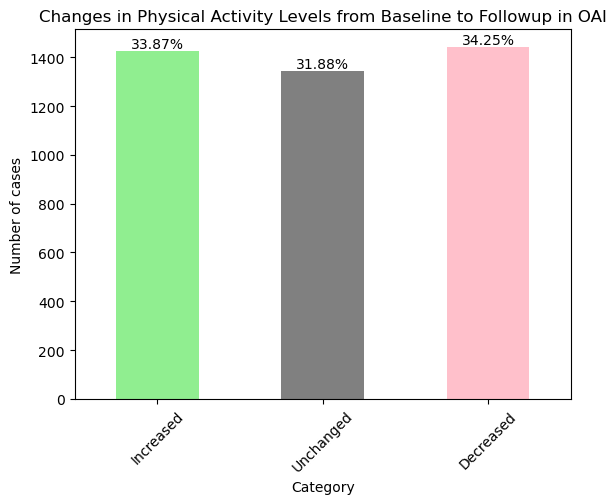

(4210, 1825)


In [19]:
# Ensure the columns are of type 'category'
df['PA_followup_category'] = df['PA_followup_category'].astype('category')
df['PA_baseline_category'] = df['PA_baseline_category'].astype('category')

# Convert categories to codes if they are ordinal
df['PA_followup_category_code'] = df['PA_followup_category'].cat.codes
df['PA_baseline_category_code'] = df['PA_baseline_category'].cat.codes

# Calculate the difference
df['PA_change'] = df['PA_followup_category_code'] - df['PA_baseline_category_code']

# Define the function to categorize PA_changes
def categorize_change(PA_change):
    if PA_change > 0:
        return 'Increased'
    elif PA_change < 0:
        return 'Decreased'
    else:
        return 'Unchanged'

# Apply the function to categorize PA_changes
df['PA_change_category'] = df['PA_change'].apply(categorize_change)

# Calculate counts for each category of PA_change
change_counts = df['PA_change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Plot
ax = change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Physical Activity Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()
print(df.shape)

##### Physical activity in GLA:D

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/3293589985.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['PA_change'] = dfg['pt12_4145'] - dfg['ptb_4145']
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/3293589985.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['PA_change_category'] = pd.cut(dfg['PA_change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/3293589985.py:31: FutureWarning: Series.__getitem__ treat

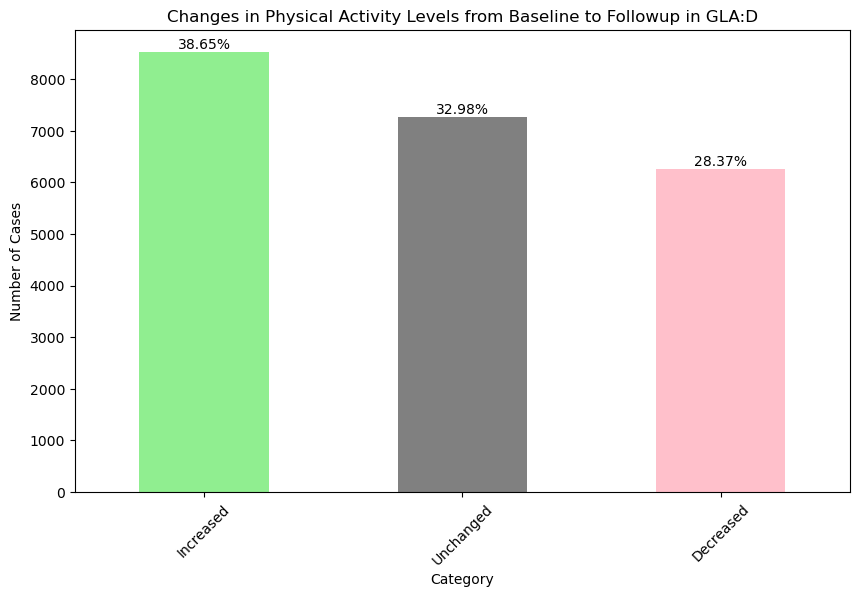

In [20]:
# Calculate the difference
dfg['PA_change'] = dfg['pt12_4145'] - dfg['ptb_4145']

# Categorize the PA_changes
dfg['PA_change_category'] = pd.cut(dfg['PA_change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
                               labels=['Decreased', 'Unchanged', 'Increased'])

# Ensure the order: Increased, Unchanged, Decreased
order = ['Increased', 'Unchanged', 'Decreased']

# Count the number of cases in each category, reindex to ensure order
PA_change_counts = dfg['PA_change_category'].value_counts().reindex(order)

# Calculate percentages
total = PA_change_counts.sum()
percentages = (PA_change_counts / total * 100).round(2)

# Specify colors for each category
colors = ['lightgreen', 'grey', 'pink']

# Visualize the results with a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
PA_change_counts.plot(kind='bar', color=colors, ax=ax)
plt.title('Changes in Physical Activity Levels from Baseline to Followup in GLA:D')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=45)

# Annotate each bar with the percentage of cases
for i, value in enumerate(PA_change_counts.values):
    ax.text(i, value, f'{percentages[i]}%', ha='center', va='bottom')

plt.show()


In [21]:
dfg.shape

(22063, 1242)

##### Quality of life in OAI

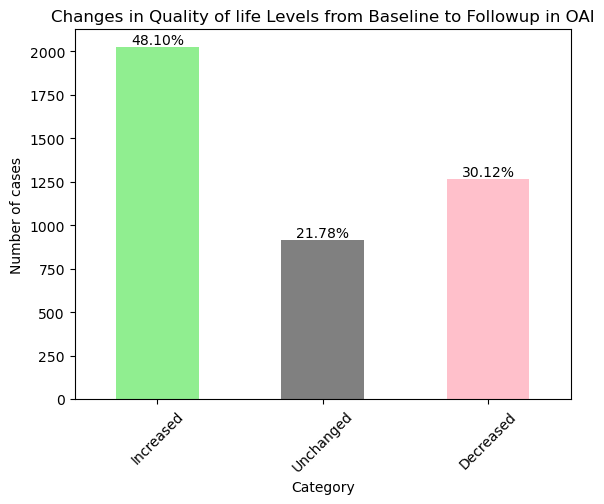

In [22]:
# Calculate the difference
df['QOL_change'] = df['V01KOOSQOL'] - df['V00KOOSQOL']


# Define the function to categorize QOL_changes
def QOL_categorize_change(QOL_change):
    if QOL_change > 0:
        return 'Increased'
    elif QOL_change < 0:
        return 'Decreased'
    
    else:
        return 'Unchanged'

# Apply the function to categorize QOL_changes
df['QOL_change_category'] = df['QOL_change'].apply(QOL_categorize_change)

# Calculate counts for each category of QOL_change
change_counts = df['QOL_change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Plot
ax = change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Quality of life Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Quality of life in OAI: changes of at least 10 points

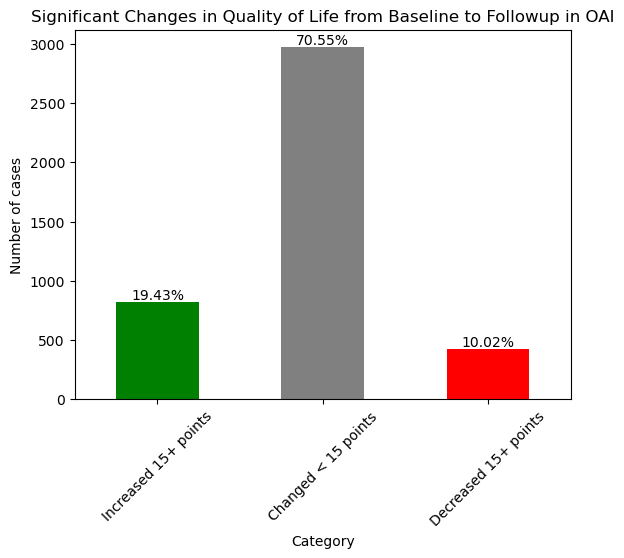

In [23]:
# Calculate the difference
df['QOL_change'] = df['V01KOOSQOL'] - df['V00KOOSQOL']

# Define the function to categorize changes of at least 15 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 15:
        return 'Increased 15+ points'
    elif QOL_change <= -15:
        return 'Decreased 15+ points'
    else:
        return 'Changed < 15 points'
    
# Apply the function to categorize significant QOL_changes
df['QOL_significant_change_category'] = df['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change
change_counts = df['QOL_significant_change_category'].value_counts().reindex(['Increased 15+ points', 'Changed < 15 points', 'Decreased 15+ points'])

# Plot
ax = change_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Significant Changes in Quality of Life from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Quality of life in GLAD

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/1487414653.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['QOL_change'] = dfg['pt12_koos_qol_score'] - dfg['ptb_koos_qol_score']
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/1487414653.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['QOL_change_category'] = dfg['QOL_change'].apply(QOL_categorize_change)


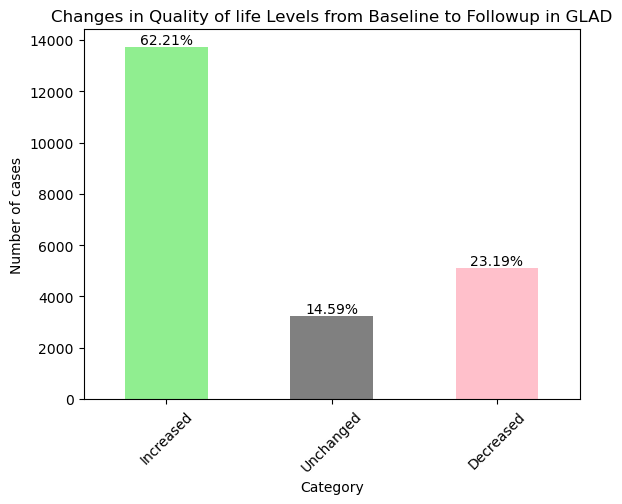

In [24]:
# Calculate the difference 
dfg['QOL_change'] = dfg['pt12_koos_qol_score'] - dfg['ptb_koos_qol_score']


# Define the function to categorize changes
def QOL_categorize_change(QOL_change):
    if QOL_change > 0:
        return 'Increased'
    elif QOL_change < 0:
        return 'Decreased'
    
    else:
        return 'Unchanged'

# Apply the function to categorize QOL_changes
dfg['QOL_change_category'] = dfg['QOL_change'].apply(QOL_categorize_change)

# Calculate counts for each category of QOL_change
QOL_change_counts = dfg['QOL_change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Plot
ax = QOL_change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Quality of life Levels from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = QOL_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Quality of life in GLAD: changes of at least 10 point

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/1911112175.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['QOL_significant_change_category'] = dfg['QOL_change'].apply(QOL_categorize_significant_change)


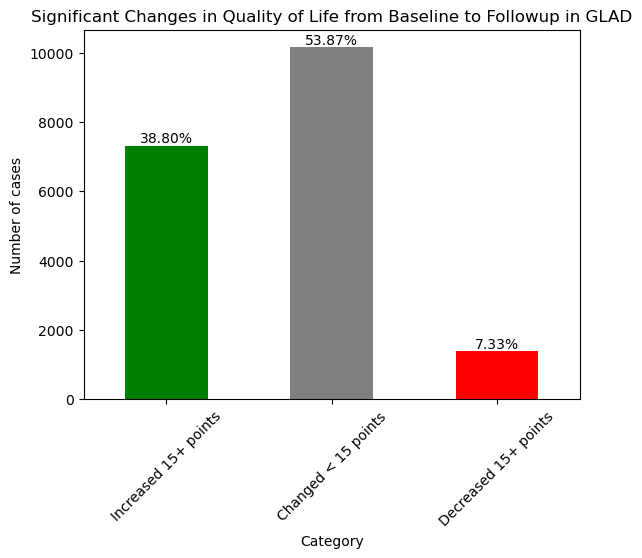

In [25]:
# Calculate the difference
dfg['QOL_change'] = dfg['pt12_koos_qol_score'] - dfg['ptb_koos_qol_score']

# Define the function to categorize changes of at least 15 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 15:
        return 'Increased 15+ points'
    elif QOL_change <= -15:
        return 'Decreased 15+ points'
    elif QOL_change == 0:
        return 'Unchanged'
    else:
        return 'Changed < 15 points'

# Apply the function to categorize significant QOL_changes
dfg['QOL_significant_change_category'] = dfg['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change
QOL_significant_change_counts = dfg['QOL_significant_change_category'].value_counts().reindex(['Increased 15+ points', 'Changed < 15 points', 'Decreased 15+ points'])

# Plot
ax = QOL_significant_change_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Significant Changes in Quality of Life from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = QOL_significant_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in OAI

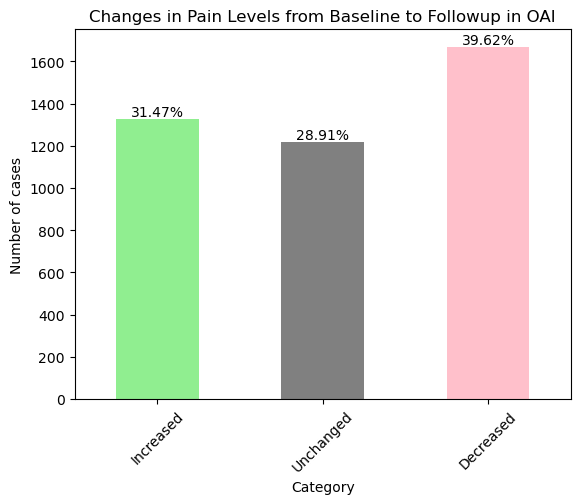

In [26]:
# Calculate the difference
df['pain_change'] = df['knee_pain_follow'] - df['knee_pain_baseline']


# Define the function to categorize changes
def pain_categorize_change(pain_change):
    if pain_change > 0:
        return 'Increased'
    elif pain_change < 0:
        return 'Decreased'
    
    else:
        return 'Unchanged'

# Apply the function to categorize pain_changes
df['pain_change_category'] = df['pain_change'].apply(pain_categorize_change)

# Calculate counts for each category of pain_change
change_counts = df['pain_change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Plot
ax = change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Pain Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in OAI: changes of at least 20 points

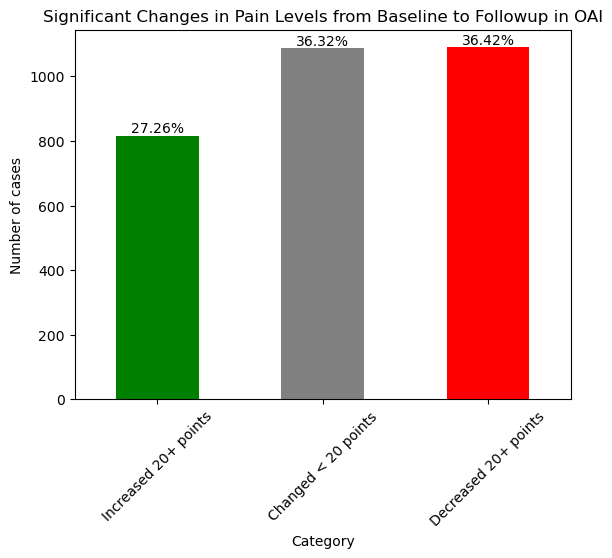

In [27]:
# Calculate the difference
df['pain_change'] = df['knee_pain_follow'] - df['knee_pain_baseline']

# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    elif pain_change == 0:
        return 'Unchanged'
    else:
        return 'Changed < 20 points'  # This now clearly means the pain changed but less than 20 points either way
    
# Apply the function to categorize significant pain changes
df['pain_significant_change_category'] = df['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change
change_counts = df['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Changed < 20 points', 'Decreased 20+ points'])

# Plot
ax = change_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Significant Changes in Pain Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in GLAD

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/384296202.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['pain_change'] = dfg['pt12_3764'] - dfg['ptb_3764']
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/384296202.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['pain_change_category'] = dfg['pain_change'].apply(pain_categorize_change)


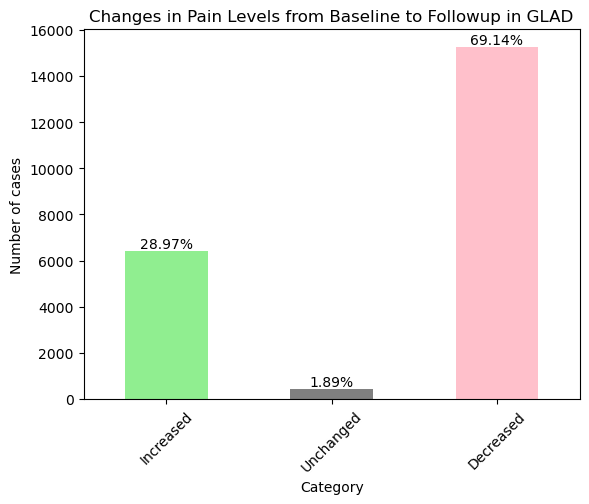

In [28]:
# Calculate the difference
dfg['pain_change'] = dfg['pt12_3764'] - dfg['ptb_3764']


# Define the function to categorize changes
def pain_categorize_change(pain_change):
    if pain_change > 0:
        return 'Increased'
    elif pain_change < 0:
        return 'Decreased'
    
    else:
        return 'Unchanged'

# Apply the function to categorize pain_changes
dfg['pain_change_category'] = dfg['pain_change'].apply(pain_categorize_change)

# Calculate counts for each category of pain_change
pain_change_counts = dfg['pain_change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Plot
ax = pain_change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Pain Levels from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = pain_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in GLAD: changes of at least 20 points

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_70641/2202763568.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['pain_significant_change_category'] = dfg['pain_change'].apply(pain_categorize_significant_change)


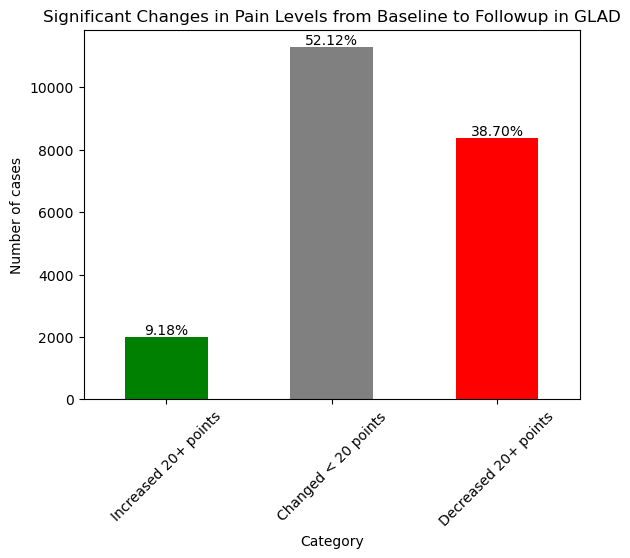

In [29]:
# Calculate the difference
dfg['pain_change'] = dfg['pt12_3764'] - dfg['ptb_3764']

# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    elif pain_change == 0:
        return 'Unchanged'
    else:
        return 'Changed < 20 points'  # This now clearly means the pain changed but less than 20 points either way

# Apply the function to categorize significant pain changes
dfg['pain_significant_change_category'] = dfg['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change
pain_significant_change_counts = dfg['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Changed < 20 points', 'Decreased 20+ points'])

# Plot
ax = pain_significant_change_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Significant Changes in Pain Levels from Baseline to Followup in GLAD')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = pain_significant_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


#### Shape

In [30]:
print("Shape of GLAD dataset", dfg.shape)
print("Shape of OAI dataset", df.shape)

Shape of GLAD dataset (22063, 1248)
Shape of OAI dataset (4210, 1831)


In [31]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,PA_followup_category_code,PA_baseline_category_code,PA_change,PA_change_category,QOL_change,QOL_change_category,QOL_significant_change_category,pain_change,pain_change_category,pain_significant_change_category
0,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0,0,0,Unchanged,18.75,Increased,Increased 15+ points,-30.0,Decreased,Decreased 20+ points
1,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,2,0,2,Increased,-37.50,Decreased,Decreased 15+ points,40.0,Increased,Increased 20+ points
2,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,3,0,3,Increased,18.75,Increased,Increased 15+ points,-10.0,Decreased,Changed < 20 points
3,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0,0,0,Unchanged,6.25,Increased,Changed < 15 points,0.0,Unchanged,Unchanged
4,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0,0,0,Unchanged,-6.25,Decreased,Changed < 15 points,10.0,Increased,Changed < 20 points
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,5,9,-4,Decreased,25.00,Increased,Increased 15+ points,0.0,Unchanged,Unchanged
4304,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,4,9,-5,Decreased,0.00,Unchanged,Changed < 15 points,0.0,Unchanged,Unchanged
4305,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,9,9,0,Unchanged,31.25,Increased,Increased 15+ points,-20.0,Decreased,Decreased 20+ points
4306,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,7,9,-2,Decreased,6.25,Increased,Changed < 15 points,20.0,Increased,Increased 20+ points


In [32]:
dfg

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,ptb_3764,pt12_3764,PA_change,PA_change_category,QOL_change,QOL_change_category,QOL_significant_change_category,pain_change,pain_change_category,pain_significant_change_category
36,2013-03-18 11:28:47,2013-03-18,11479,11479,3.0,5.0,66,2,107.0,165.0,...,49.0,22.0,1.0,Increased,25.00,Increased,Increased 15+ points,-27.0,Decreased,Decreased 20+ points
37,2013-03-18 12:07:07,2013-03-18,11479,11479,3.0,5.0,48,2,99.0,166.0,...,87.0,58.0,1.0,Increased,31.25,Increased,Increased 15+ points,-29.0,Decreased,Decreased 20+ points
39,2013-03-19 11:46:56,2013-03-19,11479,11479,3.0,5.0,47,2,80.3,173.0,...,95.0,37.0,1.0,Increased,18.75,Increased,Increased 15+ points,-58.0,Decreased,Decreased 20+ points
41,2013-03-21 12:20:13,2013-03-21,11496,11496,3.0,5.0,64,2,63.0,160.0,...,44.0,26.0,-2.0,Decreased,25.00,Increased,Increased 15+ points,-18.0,Decreased,Changed < 20 points
44,2013-03-21 18:19:08,2013-03-21,11489,11489,3.0,3.0,60,2,77.0,164.0,...,65.0,82.0,2.0,Increased,-18.75,Decreased,Decreased 15+ points,17.0,Increased,Changed < 20 points
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60280,2022-01-12 10:57:11,2022-01-12,328853,328853,3.0,2.0,54,2,86.5,174.0,...,69.0,26.0,0.0,Unchanged,25.00,Increased,Increased 15+ points,-43.0,Decreased,Decreased 20+ points
60297,2022-01-12 14:12:35,2022-01-12,359434,359434,3.0,3.0,47,2,84.0,178.0,...,47.0,92.0,-2.0,Decreased,-25.00,Decreased,Decreased 15+ points,45.0,Increased,Increased 20+ points
60298,2022-01-12 14:18:03,2022-01-12,360248,360248,3.0,4.0,65,2,96.0,178.0,...,71.0,68.0,-2.0,Decreased,-6.25,Decreased,Changed < 15 points,-3.0,Decreased,Changed < 20 points
60305,2022-01-13 08:31:09,2022-01-13,16717,16717,3.0,3.0,45,2,75.0,167.0,...,81.0,47.0,0.0,Unchanged,0.00,Unchanged,Unchanged,-34.0,Decreased,Decreased 20+ points


In [33]:
df.shape

(4210, 1831)

In [34]:
dfg.shape

(22063, 1248)